In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## Import rainfall & flow data into dataframes

In [2]:
flow60 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 1)

In [3]:
%%time
rainfall60 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 3)

CPU times: user 2min 4s, sys: 861 ms, total: 2min 5s
Wall time: 2min 6s


In [4]:
#Replace missing values with NaN for flow and rainfall
rainfall60_filtered = rainfall60.replace('  ---',"NaN") #There are two spaces before the dashes in the rainfall data
flow60_filtered = flow60.replace(" ---","NaN")
rainfall60_filtered = rainfall60_filtered.replace(".", 0) #Replacing . to 0
rainfall60_filtered.head()

,Date,Time,Precipitation [mm],Quality,Interpolation,Valid,Invalid,Missing,Tags,Remarks
0,1979-07-26,09:00:00,0,40 (G),const since previous,0.0,0.0,0.0,NaN,NaN
1,1979-07-26,10:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
2,1979-07-26,11:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
3,1979-07-26,12:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
4,1979-07-26,13:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN


In [5]:
#Print rainfall data with missing values - only 3 values missing
print(rainfall60['Date'][rainfall60['Quality']=='missing'].unique())

['1980-04-30T00:00:00.000000000' '1980-05-01T00:00:00.000000000'
 '2002-10-03T00:00:00.000000000']


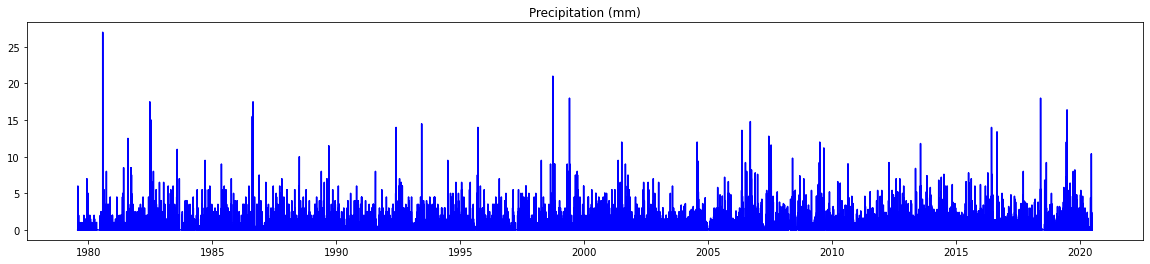

In [6]:
#Plot the rainfall time series for the 60 minute data
#print(rainfall60_filtered['Precipitation [mm]'])

plt.figure(figsize=(20,4))
plt.plot(rainfall60_filtered['Date'],rainfall60_filtered['Precipitation [mm]'], 'blue')
plt.title("Precipitation (mm)")

#rainfall60_filtered.plot(x='Date', y='Precipitation [mm]')
plt.show()

Importing 15 minute rainfall data

In [7]:
#%%time
#rainfall15 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 15 min.xlsx', sheet_name = 3)

In [8]:
#rainfall15_filtered = rainfall15.replace("  ---","NaN")   #Replacing missing values again
#rainfall15_filtered = rainfall15_filtered.replace('.', 0)
#rainfall15_filtered.head()

In [9]:
#Print rainfall data with missing values - only 1 value missing
#print(rainfall15['Date'][rainfall15['Quality']=='missing'].unique())

In [10]:
#Plot the rainfall time series for the 15 minute data 
#plt.figure(figsize=(20,8))
#plt.plot(rainfall15_filtered['Date'],rainfall15_filtered['Precipitation [mm]'], 'blue')
#plt.yticks()
#plt.title("Precipitation (mm)")

Look at relationship between flow and rainfall

In [11]:
#Try and compare 60 minute rainfall data to 60 minute flow data
df_flow_and_rainfall = pd.merge(rainfall60_filtered, flow60_filtered, on=['Date', 'Time']) #Merge the dataframes
df_flow_and_rainfall = df_flow_and_rainfall.rename(columns= #Renaming columns for ease of use
                                             {'Quality_x':'Quality_rainfall', 
                                              'Quality_y':'Quality_flow', 
                                              'Flow [m³/s]':'flow',
                                              'Precipitation [mm]':'rainfall'})

df_flow_and_rainfall.head()

,Date,Time,rainfall,Quality_rainfall,Interpolation_x,Valid,Invalid,Missing,Tags_x,Remarks_x,flow,Quality_flow,Interpolation_y,Tags_y,Remarks_y
0,1986-01-08,14:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN,5.73,200 (U),linear interpolation,NaN,NaN
1,1986-01-08,15:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN,5.85,200 (U),linear interpolation,NaN,NaN
2,1986-01-08,16:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN,5.97,200 (U),linear interpolation,NaN,NaN
3,1986-01-08,17:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN,6.09,200 (U),linear interpolation,NaN,NaN
4,1986-01-08,18:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN,6.18,200 (U),linear interpolation,NaN,NaN


In [12]:
print(df_flow_and_rainfall['Date'][df_flow_and_rainfall['Quality_rainfall']=='missing'].unique())

['2002-10-03T00:00:00.000000000']


In [13]:
print(df_flow_and_rainfall['Date'][df_flow_and_rainfall['Quality_flow']=='missing'].unique())

['1987-02-11T00:00:00.000000000' '1987-02-12T00:00:00.000000000'
 '1987-02-13T00:00:00.000000000' '1987-02-14T00:00:00.000000000'
 '1987-02-15T00:00:00.000000000' '1987-02-16T00:00:00.000000000'
 '1987-02-17T00:00:00.000000000' '1987-02-18T00:00:00.000000000'
 '1987-03-25T00:00:00.000000000' '1987-03-26T00:00:00.000000000'
 '1987-03-27T00:00:00.000000000' '1987-03-28T00:00:00.000000000'
 '1987-03-29T00:00:00.000000000' '1987-03-30T00:00:00.000000000'
 '1987-03-31T00:00:00.000000000' '1987-04-01T00:00:00.000000000']


In [14]:
#Get rid of any input pairs to the regression with missing values -not sure quite understand this
df_flow_and_rainfall_complete = df_flow_and_rainfall[df_flow_and_rainfall['Quality_flow'] != 'missing']  
df_flow_and_rainfall_complete = df_flow_and_rainfall_complete[df_flow_and_rainfall_complete['Quality_flow'] != 'missing']

#Remove 0 values of precipitation
#df_flow_and_rainfall_complete.drop(df_flow_and_rainfall_complete.index[df_flow_and_rainfall_complete['rainfall'] == '0'], inplace = True)
#Remove 0 values of flow
#df_flow_and_rainfall_complete.drop(df_flow_and_rainfall_complete.index[df_flow_and_rainfall_complete['flow'] == '0'], inplace = True)

<AxesSubplot:xlabel='rainfall', ylabel='flow'>

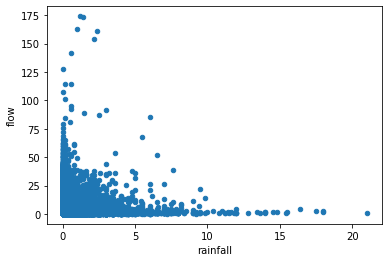

In [15]:
#Plot rainfall and flow against eachother 
df_flow_and_rainfall_complete.plot.scatter(x='rainfall', y='flow')
#plt.xlim(left=0)


Look at monthly means of flow and rainfall data 

In [16]:
#Try taking monthly means of flow data to simplify plot and look at correlation

flow60_filtered_dt=flow60_filtered.set_index(pd.to_datetime(flow60_filtered['Date']))
flow60_filtered_dt.head()

flow60_flowonly = flow60_filtered_dt.loc[:,['Flow [m³/s]']]
flow60_flowonly.head()

flow60_flowonly['Flow [m³/s]'] = flow60_flowonly['Flow [m³/s]'].astype(float)
flow60_flowonly.dtypes

monthly_mean_flow = flow60_flowonly.resample('M').mean()    

In [17]:
#Try taking monthly means of rainfall data to simplify plot and look at correlation

rainfall60_filtered_dt=rainfall60_filtered.set_index(pd.to_datetime(rainfall60_filtered['Date']))
rainfall60_filtered_dt.head()

rainfall60_rain = rainfall60_filtered_dt.loc[:,['Precipitation [mm]']]
rainfall60_rain.head()

rainfall60_rain['Precipitation [mm]'] = rainfall60_rain['Precipitation [mm]'].astype(float)
monthly_mean_rainfall = rainfall60_rain.resample('M').mean()

Text(0.5, 1.0, 'Monthly Averages of Rainfall and Flow')

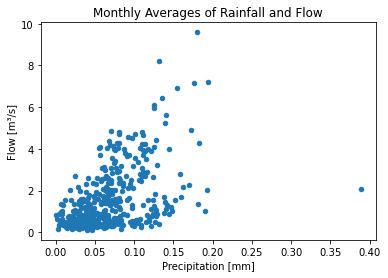

In [18]:
flow_and_rainfall_monthly = pd.merge(monthly_mean_rainfall, monthly_mean_flow, on=['Date']) #Merge the dataframes
flow_and_rainfall_monthly.head()


flow_and_rainfall_monthly.plot.scatter(x='Precipitation [mm]', y='Flow [m³/s]')
plt.title('Monthly Averages of Rainfall and Flow')
#plt.xlim(right=0.25)

Look at rainfall vs. stage

In [19]:
#Try the rainfall against the stage 
#import stage data

stage60 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 2)

In [20]:
stage60_filtered = stage60.replace(" ---","NaN")
stage60_filtered.head()

,Date,Time,Stage [m],Quality,Interpolation,Tags,Remarks
0,1973-07-23,11:00:00,0.472,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002
1,1973-07-23,12:00:00,0.468,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002
2,1973-07-23,13:00:00,0.463,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002
3,1973-07-23,14:00:00,0.458,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002
4,1973-07-23,15:00:00,0.454,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002


In [21]:
df_rainfall_and_stage = pd.merge(stage60_filtered, rainfall60_filtered, on=['Date', 'Time']) #Merge the dataframes

df_rainfall_and_stage = df_rainfall_and_stage.rename(columns= #Renaming columns for ease of use
                                             {'Quality_x':'Quality_stage', 
                                              'Quality_y':'Quality_rainfall', 
                                              'Precipitation [mm]':'rainfall',
                                              'Stage [m]':'stage'})

df_rainfall_and_stage.head()

,Date,Time,stage,Quality_stage,Interpolation_x,Tags_x,Remarks_x,rainfall,Quality_rainfall,Interpolation_y,Valid,Invalid,Missing,Tags_y,Remarks_y
0,1979-07-26,09:00:00,0.274,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002,0,40 (G),const since previous,0.0,0.0,0.0,NaN,NaN
1,1979-07-26,10:00:00,0.275,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
2,1979-07-26,11:00:00,0.275,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
3,1979-07-26,12:00:00,0.275,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
4,1979-07-26,13:00:00,0.275,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN


In [22]:
#Get rid of any input pairs to the regression with missing values
df_rainfall_and_stage_complete = df_rainfall_and_stage[df_rainfall_and_stage['Quality_stage'] != 'missing']  
df_rainfall_and_stage_complete = df_rainfall_and_stage_complete[df_rainfall_and_stage_complete['Quality_stage'] != 'missing'] 

<AxesSubplot:xlabel='rainfall', ylabel='stage'>

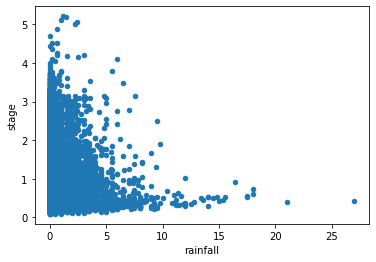

In [23]:
df_rainfall_and_stage_complete.plot.scatter(x='rainfall', y='stage')

In [24]:
#Look at monthly mean of rainfall and stage data
stage60_filtered_dt=stage60_filtered.set_index(pd.to_datetime(stage60_filtered['Date']))
stage60_filtered_dt.head()

stage60_stageonly = stage60_filtered_dt.loc[:,['Stage [m]']]
stage60_stageonly.head()

stage60_stageonly['Stage [m]'] = stage60_stageonly['Stage [m]'].astype(float)
stage60_stageonly.dtypes

monthly_mean_stage = stage60_stageonly.resample('M').mean() 

Text(0.5, 1.0, 'Monthly Averages of Rainfall and Stage')

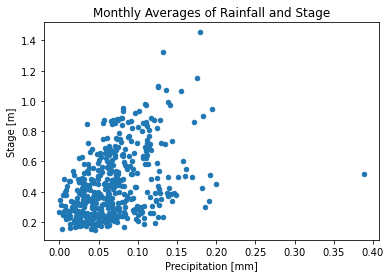

In [25]:
stage_and_rainfall_monthly = pd.merge(monthly_mean_rainfall, monthly_mean_stage, on=['Date']) #Merge the dataframes
stage_and_rainfall_monthly.head()


stage_and_rainfall_monthly.plot.scatter(x='Precipitation [mm]', y='Stage [m]')
plt.title('Monthly Averages of Rainfall and Stage')
#plt.xlim(right=0.25)

# GP Fits

These are useless given the data

In [26]:
#Try and predict stage from rainfall 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF


#df_rainfall_and_stage_dropped_nans=df_rainfall_and_stage_complete.dropna()

#X = df_rainfall_and_stage_complete['rainfall'].values.reshape(-1,1)
#y = df_rainfall_and_stage_complete['stage'].values

stage_and_rainfall_monthly_dropped_nans=stage_and_rainfall_monthly.dropna()
#print(stage_and_rainfall_monthly_dropped_nans)

X = stage_and_rainfall_monthly_dropped_nans['Precipitation [mm]'].values.reshape(-1,1)
y = stage_and_rainfall_monthly_dropped_nans['Stage [m]'].values


y = y[np.argsort(X, axis=0)] #Reorder them from time order to ascending by value
X = np.sort(X, axis=0) #So that the line plot looks sensible

X_train = np.append(X[0::500], X[-100:], axis = 0) #Every 500th data point and the last 100
y_train = np.append(y[0::500], y[-100:], axis = 0)
#print(X_train)

#Sort X_train into ascending order (for plotting)


kernel = RBF(5, (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=10, alpha = 0.1**2)

gp.fit(X_train, y_train)

print(gp.kernel_)


RBF(length_scale=0.01)


In [27]:
gp.score(X,y)      

y_pred, sigma = gp.predict(X, return_std=True)

mean_sq_err = ((y_pred - y)**2).mean()       

print("RMS error in rainfall is: " + str(np.sqrt(mean_sq_err)) + " [mm]")

mean_abs_prc_err = (abs( (y_pred - y) / y) ).mean()

print("MAP error in rainfall is: " + str(100*mean_abs_prc_err) + "%")

RMS error in rainfall is: 0.47324078180418205 [mm]
MAP error in rainfall is: 95.17735215910353%


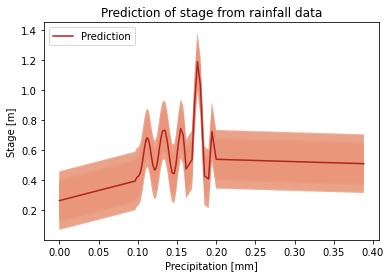

In [28]:
#Plot predictions based on the training data to avoid memory errors
y_pred_train, sigma = gp.predict(X_train, return_std=True) 

plt.figure()
plt.plot(X_train, y_pred_train, 'firebrick', label='Prediction')
#plt.scatter(X, y, marker='x', color='coral', label = 'Observations')
plt.fill(np.concatenate([X_train, X_train[::-1]]),
         np.concatenate([y_pred_train - 1.9600 * sigma,
                        (y_pred_train + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='darksalmon', ec='None')
plt.xlabel('Precipitation [mm]')
plt.ylabel('Stage [m]')
plt.title('Prediction of stage from rainfall data')

plt.legend(loc='upper left')

plt.show()

Try GP fit for whole data set (won't run)

In [30]:
stage60_stageonly.head()
rainfall60_rain.head()

stage_and_rainfall_only = pd.merge(rainfall60_rain, stage60_stageonly, on=['Date'])
stage_and_rainfall_only.head()

stage_and_rainfall_only_dropped_nans=stage_and_rainfall_only.dropna()
#print(stage_and_rainfall_monthly_dropped_nans)

X = stage_and_rainfall_only_dropped_nans['Precipitation [mm]'].values.reshape(-1,1)
y = stage_and_rainfall_only_dropped_nans['Stage [m]'].values


y = y[np.argsort(X, axis=0)] #Reorder them from time order to ascending by value
X = np.sort(X, axis=0) #So that the line plot looks sensible

X_train = np.append(X[0::500], X[-100:], axis = 0) #Every 500th data point and the last 100
y_train = np.append(y[0::500], y[-100:], axis = 0)
#print(X_train)

#Sort X_train into ascending order (for plotting)


#kernel = RBF(5, (1e-2, 1e2))

#gp = GaussianProcessRegressor(kernel=kernel,
                              #n_restarts_optimizer=10, alpha = 0.1**2)

#gp.fit(X_train, y_train)

#print(gp.kernel_)

In [31]:
#Look at precipitation data from Chipping Camden
rainfall60_CC = pd.read_excel('EA_files_subsample/Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 4)

In [ ]:
rainfall60_CC_filtered = rainfall60_CC.replace('  ---',"NaN")
rainfall60_CC_filtered = rainfall60_CC_filtered.replace(".", 0) #Replacing . to 0
rainfall60_CC_filtered.head()

In [ ]:
print(rainfall60_CC['Date'][rainfall60_CC['Quality']=='missing'].unique())

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(rainfall60_CC_filtered['Date'],rainfall60_CC_filtered['Precipitation [mm]'], 'blue')
plt.title("Precipitation Chipping Camden (mm)")
plt.show()

In [ ]:
#Try and compare 60 minute rainfall Chipping Camden data to 60 minute flow data
df_flow_and_rainfallCC = pd.merge(rainfall60_CC_filtered, flow60_filtered, on=['Date', 'Time']) #Merge the dataframes
df_flow_and_rainfallCC = df_flow_and_rainfallCC.rename(columns= #Renaming columns for ease of use
                                             {'Quality_x':'Quality_rainfall', 
                                              'Quality_y':'Quality_flow', 
                                              'Flow [m³/s]':'flow',
                                              'Precipitation [mm]':'rainfall'})

df_flow_and_rainfallCC.head()

In [ ]:
#Get rid of any input pairs to the regression with missing values -not sure quite understand this
df_flow_and_rainfallCC_complete = df_flow_and_rainfallCC[df_flow_and_rainfallCC['Quality_flow'] != 'missing']  
df_flow_and_rainfallCC_complete = df_flow_and_rainfallCC_complete[df_flow_and_rainfallCC_complete['Quality_flow'] != 'missing']

In [ ]:
#Plot rainfall and flow against eachother 
df_flow_and_rainfallCC_complete.plot.scatter(x='rainfall', y='flow')